# **<font color='red'>Introduction and Initial Data Exploration</font>**

### **Project background and objectives**

### **Dataset overview and descriptive statistics**

To begin with, we will import all the libraries we will use in this project, as well as our dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor






df = pd.read_csv('autos.csv')

### General overview of the dataset

In [48]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [49]:
df.shape

(371528, 21)

We have a dataset containing 21 columns describing more than 370,000 used car listings. These columns include information on the vehicle specifications, equipment, mileage, age, fuel type, location, and other relevant characteristics.
The goal is to predict the **price** of a used car based on these features.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [51]:
df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


### Motivation for data cleaning

The descriptive statistics allow us to obtain an initial overview of the numerical variables and to identify potential inconsistencies in the data. We can already observe unrealistic values (e.g., registration years ranging from 1000 to 9999, power values up to 20,000 PS, extremely large price values), as well as large disparities in scale between the different features.
These observations suggest the presence of outliers, incorrect entries, and anomalies that could negatively affect model performance.

Therefore, before proceeding with deeper analysis or modeling, we now move on to the data cleaning phase, in which we will correct impossible values, handle missing data, detect and treat outliers, and prepare the dataset for further processing.

# **<font color='red'>Data Cleaning</font>**

### **Handling missing values**

In [52]:
missing_values = df.isnull().sum().to_frame('Missing_values')
total_rows = df.shape[0]

missing_values['Percentage_missing_values'] = ((missing_values['Missing_values'] / total_rows) * 100).round(2).astype(str) + ' %'
print(missing_values)

rows_with_missing = df.isnull().any(axis=1).sum()

print("\nThe number of rows with at least one missing value in any column is:", rows_with_missing,
      "which represents approximately", ((rows_with_missing / df.shape[0]) * 100).round(2), "%")

                     Missing_values Percentage_missing_values
index                             0                     0.0 %
dateCrawled                       0                     0.0 %
name                              0                     0.0 %
seller                            0                     0.0 %
offerType                         0                     0.0 %
price                             0                     0.0 %
abtest                            0                     0.0 %
vehicleType                   37869                   10.19 %
yearOfRegistration                0                     0.0 %
gearbox                       20209                    5.44 %
powerPS                           0                     0.0 %
model                         20484                    5.51 %
kilometer                         0                     0.0 %
monthOfRegistration               0                     0.0 %
fuelType                      33386                    8.99 %
brand   

Our initial idea was to delete all rows from the dataset containing at least one missing value. However, we realized that there are too many rows concerned, so this solution is no longer feasible because it would completely skew our predictions. We will therefore analyze and process the columns on a case-by-case basis:

### **Correcting impossible or inconsistent entries**

### **Treating extreme outliers**

### **Fixing data types and formatting** 

### **Removing duplicates or corrupted records**

Notre première idée était de supprimer toutes les lignes du dataset contenant au minimum une valeur manquante. Néanmoins, nous avons réaliser qu'il y a pas loin de 50% de valeurs manquantes donc cette solution n'est plus envisageable car cela fausserait toalement nos prédictions si uniquement la moitié du dataset est traitée. Nous allons donc analyser et traiter les colonnes au cas par cas :

In [53]:
def traitement(df):
    """
    Nettoyage du dataset automobile :
    - suppression des colonnes inutiles (postalCode conservé)
    - imputation des valeurs manquantes
    """

 
    cols_to_drop = [
        'index',
        'name',
        'dateCrawled',
        'dateCreated',
        'lastSeen',
        'seller',
        'offerType',
        'nrOfPictures'
    ]

    df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

    # ---------------------------
    # 2) Imputation par mode pour les catégorielles
    # ---------------------------
    mode_cols = ['vehicleType', 'gearbox', 'model', 'fuelType']

    for col in mode_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

    # ---------------------------
    # 3) Cas spécial : notRepairedDamage
    # ---------------------------
    if 'notRepairedDamage' in df.columns:
        df['notRepairedDamage'] = df['notRepairedDamage'].fillna('unknown')

    return df


df_train = traitement(df)
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                371528 non-null  int64 
 1   abtest               371528 non-null  object
 2   vehicleType          371528 non-null  object
 3   yearOfRegistration   371528 non-null  int64 
 4   gearbox              371528 non-null  object
 5   powerPS              371528 non-null  int64 
 6   model                371528 non-null  object
 7   kilometer            371528 non-null  int64 
 8   monthOfRegistration  371528 non-null  int64 
 9   fuelType             371528 non-null  object
 10  brand                371528 non-null  object
 11  notRepairedDamage    371528 non-null  object
 12  postalCode           371528 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 36.8+ MB


In [54]:
Valeurs_manquantes = df_train.isnull().sum().to_frame('Valeurs_manquantes')

total_rows = df_train.shape[0]

Valeurs_manquantes[' Pourcentage de valeurs manquantes'] = ((Valeurs_manquantes['Valeurs_manquantes'] / total_rows) * 100).round(2) .astype(str) + ' %'
print(Valeurs_manquantes)

                     Valeurs_manquantes  Pourcentage de valeurs manquantes
price                                 0                              0.0 %
abtest                                0                              0.0 %
vehicleType                           0                              0.0 %
yearOfRegistration                    0                              0.0 %
gearbox                               0                              0.0 %
powerPS                               0                              0.0 %
model                                 0                              0.0 %
kilometer                             0                              0.0 %
monthOfRegistration                   0                              0.0 %
fuelType                              0                              0.0 %
brand                                 0                              0.0 %
notRepairedDamage                     0                              0.0 %
postalCode               

In [55]:
duplicates = df_train[df_train.duplicated()]
print(duplicates)

        price   abtest vehicleType  yearOfRegistration    gearbox  powerPS  \
3964     2999     test   limousine                2002    manuell      101   
4094      500  control  kleinwagen                1999    manuell       55   
4332    18750  control   limousine                2014    manuell      150   
5058     5500  control   limousine                2000    manuell      170   
7314     1699     test      cabrio                1996  automatik      101   
...       ...      ...         ...                 ...        ...      ...   
371437   2200     test       coupe                2002    manuell      147   
371455   8940  control   limousine                2009    manuell       80   
371463    600     test  kleinwagen                1999    manuell       54   
371493   3299     test   limousine                2005  automatik        0   
371513   4400  control   limousine                2008    manuell      105   

            model  kilometer  monthOfRegistration fuelType     

In [56]:
signature_cols = [
    'brand',
    'model',
    'yearOfRegistration',
    'monthOfRegistration',
    'gearbox',
    'fuelType',
    'powerPS',
    'kilometer'
]

In [57]:
def doublon(df, strict=False):
    """
    Gère les doublons dans le dataset automobile.

    strict = True  -> supprime uniquement les doublons parfaitement identiques
    strict = False -> supprime aussi les doublons quasi identiques basés sur une signature véhicule
    """

    # 1) Doublons stricts
    nb_avant = df.shape[0]
    df = df.drop_duplicates(keep='first')
    nb_apres_strict = df.shape[0]

    print(f"Doublons stricts supprimés : {nb_avant - nb_apres_strict}")

    # 2) Doublons avancés (signature véhicule)
    if not strict:
        signature_cols = [
            'brand',
            'model',
            'yearOfRegistration',
            'monthOfRegistration',
            'gearbox',
            'fuelType',
            'powerPS',
            'kilometer'
        ]

        # Création de la signature
        df['signature'] = df[signature_cols].astype(str).agg('_'.join, axis=1)

        nb_avant_signature = df.shape[0]
        
        # Suppression des doublons basés sur la signature
        df = df.drop_duplicates(subset='signature', keep='first')
        nb_apres_signature = df.shape[0]

        print(f"Doublons avancés (signature véhicule) supprimés : {nb_avant_signature - nb_apres_signature}")

        # Suppression de la colonne signature
        df = df.drop(columns=['signature'])

    print(f"Nombre final de lignes : {df.shape[0]}")

    return df

df_train = doublon(df_train)

Doublons stricts supprimés : 14658
Doublons avancés (signature véhicule) supprimés : 137971
Nombre final de lignes : 218899


C:\Users\hugod\AppData\Local\Temp\ipykernel_47500\4035947574.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signature'] = df[signature_cols].astype(str).agg('_'.join, axis=1)


In [58]:
def outlier(df):
    """
    Supprime les valeurs aberrantes du dataset automobile
    via règles métier + méthode statistique IQR.
    """

    df_clean = df.copy()

    # ---------------------------
    # 1) Outliers PRICE
    # ---------------------------
    # Filtrage métier
    df_clean = df_clean[(df_clean['price'] >= 500) & (df_clean['price'] <= 150000)]

    # IQR
    Q1 = df_clean['price'].quantile(0.25)
    Q3 = df_clean['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean['price'] >= lower) & (df_clean['price'] <= upper)]

    # ---------------------------
    # 2) Outliers powerPS
    # ---------------------------
    # Filtrage métier
    df_clean = df_clean[(df_clean['powerPS'] >= 40) & (df_clean['powerPS'] <= 300)]

    # IQR
    Q1 = df_clean['powerPS'].quantile(0.25)
    Q3 = df_clean['powerPS'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean['powerPS'] >= lower) & (df_clean['powerPS'] <= upper)]

    # ---------------------------
    # 3) Outliers yearOfRegistration
    # ---------------------------
    df_clean = df_clean[(df_clean['yearOfRegistration'] >= 1950) &
                        (df_clean['yearOfRegistration'] <= 2025)]

    # ---------------------------
    # 4) Outliers kilometer
    # ---------------------------
    df_clean = df_clean[(df_clean['kilometer'] >= 1) &
                        (df_clean['kilometer'] <= 400000)]

    # ---------------------------
    # 5) Outliers monthOfRegistration (rare)
    # ---------------------------
    df_clean = df_clean[(df_clean['monthOfRegistration'] >= 1) &
                        (df_clean['monthOfRegistration'] <= 12)]

    print(f"Lignes avant nettoyage : {df.shape[0]}")
    print(f"Lignes après nettoyage : {df_clean.shape[0]}")
    print(f"Outliers supprimés     : {df.shape[0] - df_clean.shape[0]}")

    return df_clean

df_train = outlier(df_train)

Lignes avant nettoyage : 218899
Lignes après nettoyage : 150881
Outliers supprimés     : 68018


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150881 entries, 1 to 371526
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                150881 non-null  int64 
 1   abtest               150881 non-null  object
 2   vehicleType          150881 non-null  object
 3   yearOfRegistration   150881 non-null  int64 
 4   gearbox              150881 non-null  object
 5   powerPS              150881 non-null  int64 
 6   model                150881 non-null  object
 7   kilometer            150881 non-null  int64 
 8   monthOfRegistration  150881 non-null  int64 
 9   fuelType             150881 non-null  object
 10  brand                150881 non-null  object
 11  notRepairedDamage    150881 non-null  object
 12  postalCode           150881 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 16.1+ MB


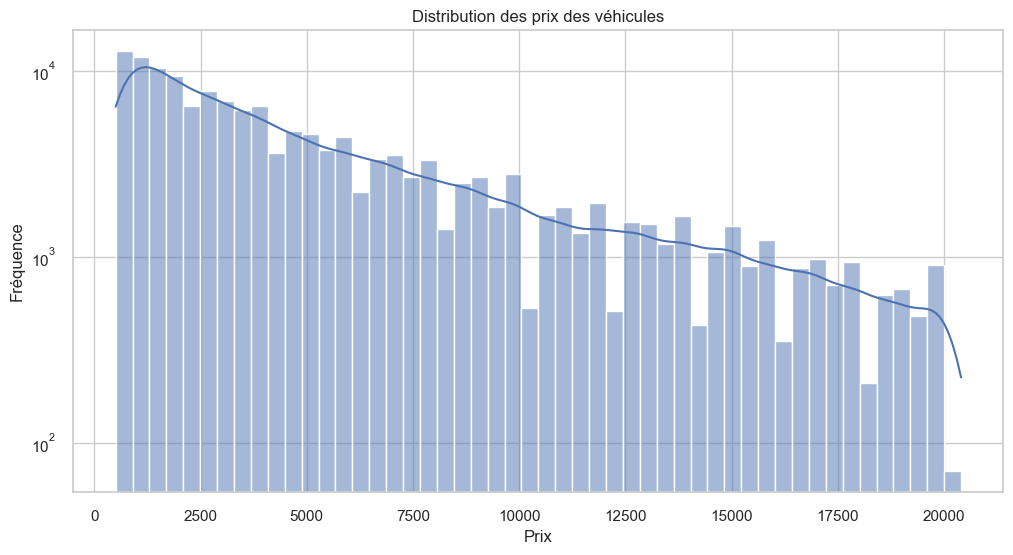

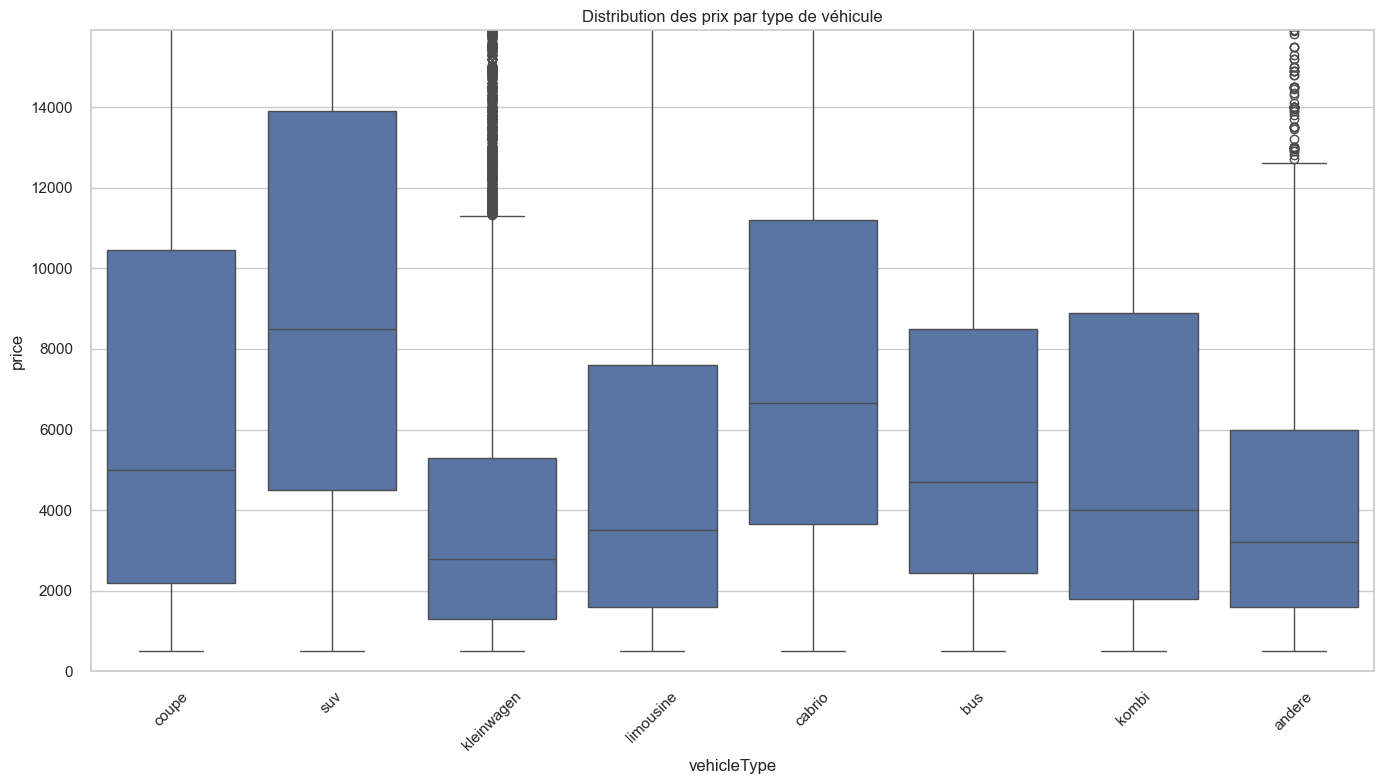

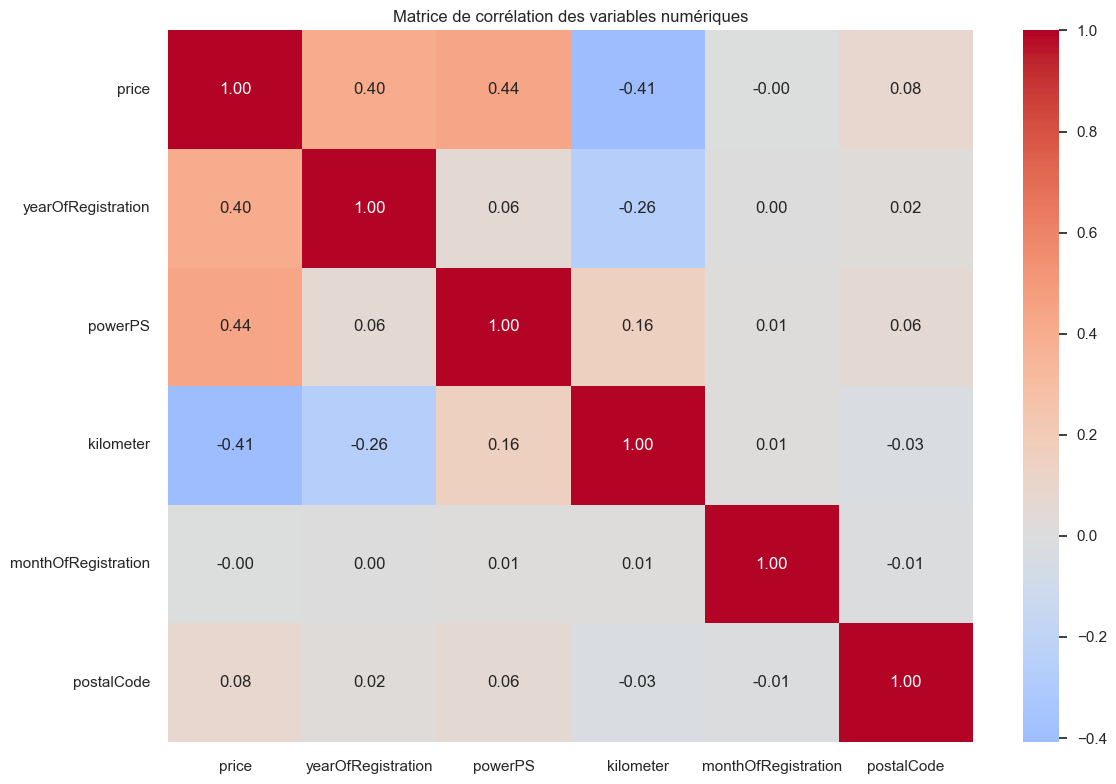

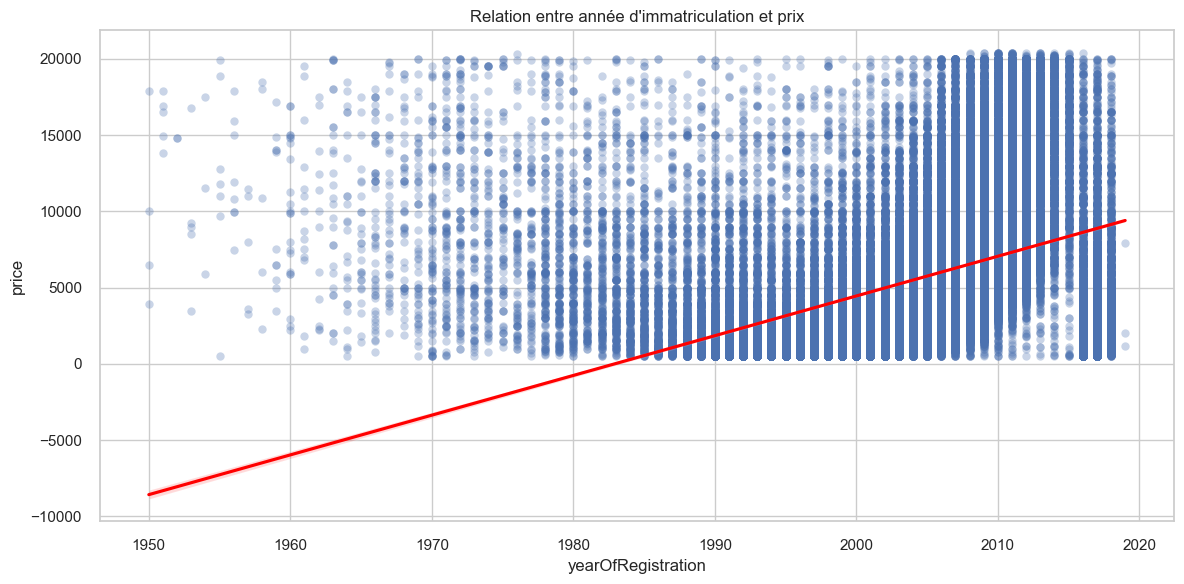

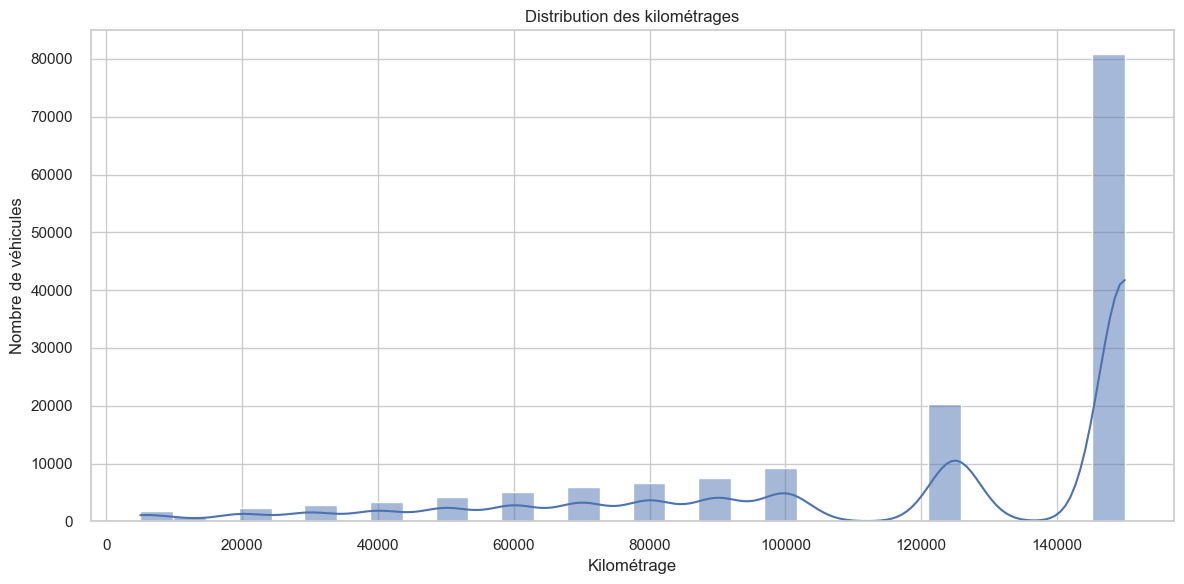

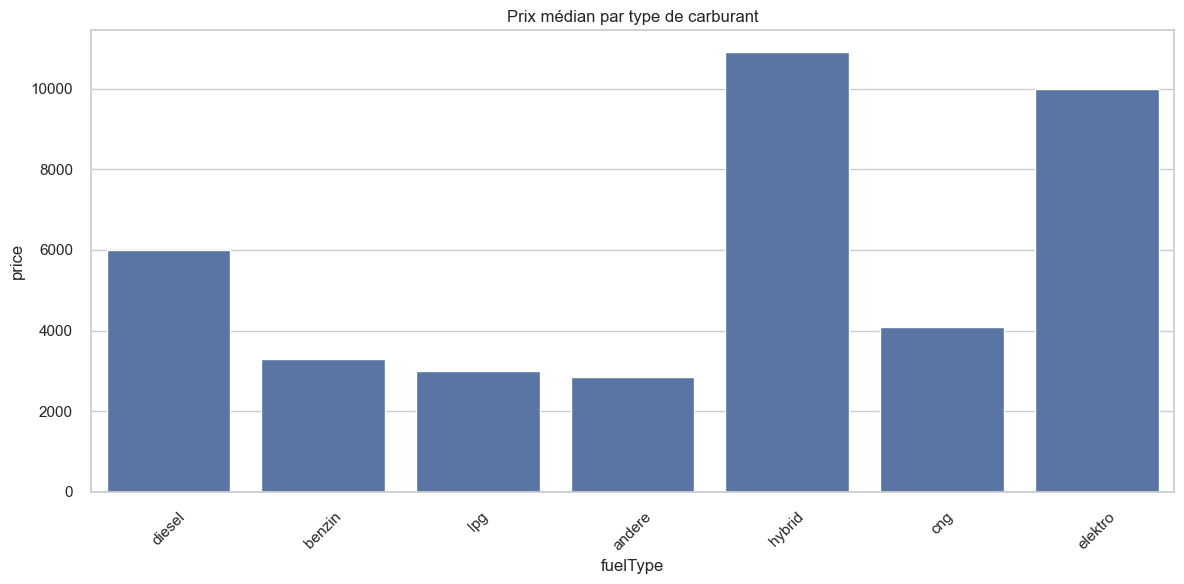

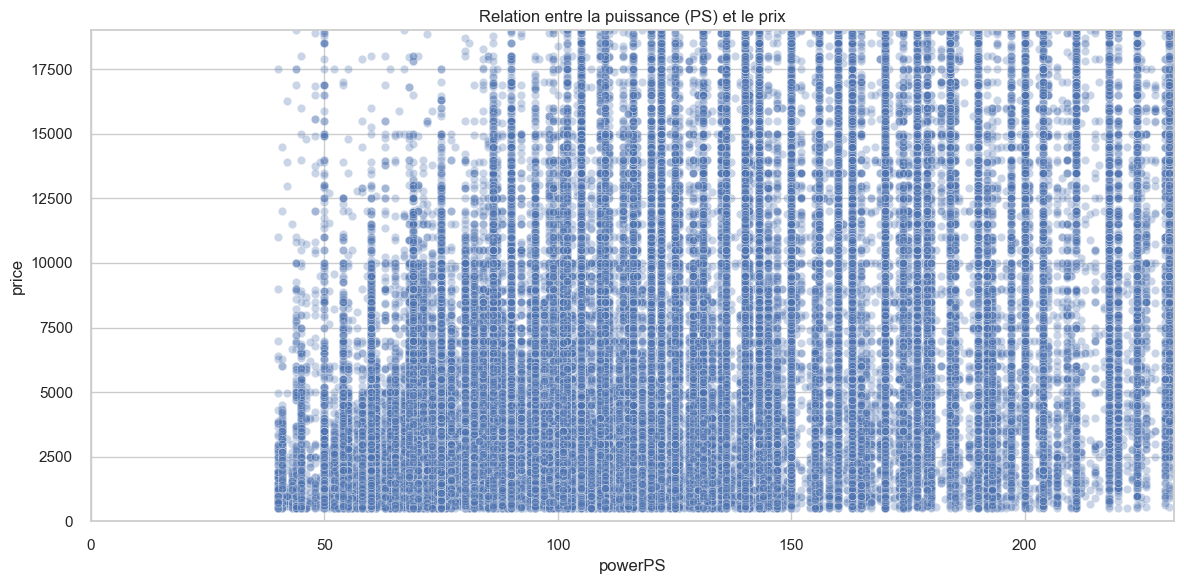

In [60]:

# Configuration du style des graphiques
plt.style.use('seaborn-v0_8')  # Style moderne de seaborn
sns.set_theme(style="whitegrid")  # Style de grille pour seaborn
plt.rcParams['figure.figsize'] = (15, 10)

# 1. Distribution des prix
plt.figure(figsize=(12, 6))
sns.histplot(df_train['price'], bins=50, kde=True)
plt.title('Distribution des prix des véhicules')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.yscale('log')
plt.show()

# 2. Boîtes à moustaches par type de véhicule
plt.figure(figsize=(14, 8))
sns.boxplot(x='vehicleType', y='price', data=df_train)
plt.title('Distribution des prix par type de véhicule')
plt.xticks(rotation=45)
plt.ylim(0, df_train['price'].quantile(0.95))
plt.tight_layout()
plt.show()

# 3. Matrice de corrélation
plt.figure(figsize=(12, 8))
corr = df_train.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

# 4. Relation entre année d'immatriculation et prix
plt.figure(figsize=(12, 6))
sns.regplot(x='yearOfRegistration', y='price', data=df_train, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relation entre année d\'immatriculation et prix')
plt.tight_layout()
plt.show()

# 5. Distribution des kilomètres
plt.figure(figsize=(12, 6))
sns.histplot(df_train['kilometer'], bins=30, kde=True)
plt.title('Distribution des kilométrages')
plt.xlabel('Kilométrage')
plt.ylabel('Nombre de véhicules')
plt.tight_layout()
plt.show()

# 6. Prix moyen par type de carburant
plt.figure(figsize=(12, 6))
sns.barplot(x='fuelType', y='price', data=df_train, 
           estimator=np.median, errorbar=None)
plt.title('Prix médian par type de carburant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Relation entre la puissance et le prix
plt.figure(figsize=(12, 6))
sns.scatterplot(x='powerPS', y='price', data=df_train, alpha=0.3)
plt.title('Relation entre la puissance (PS) et le prix')
plt.xlim(0, df_train['powerPS'].quantile(0.99))
plt.ylim(0, df_train['price'].quantile(0.99))
plt.tight_layout()
plt.show()

In [61]:
def features(df):
    df = df.copy()

    # -------------------------------
    # 1) Label Encoding pour catégorielles
    # -------------------------------
    cat_cols = [
        'abtest',
        'vehicleType',
        'gearbox',
        'model',
        'fuelType',
        'brand',
        'notRepairedDamage'
    ]

    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

    # -------------------------------
    # 2) Features dérivées automobiles
    # -------------------------------

    # Âge du véhicule
    df["car_age"] = 2025 - df["yearOfRegistration"]

    # Km par an (plus important que le km brut)
    df["km_per_year"] = df["kilometer"] / (df["car_age"] + 1)

    # Indique si la voiture a été immatriculée en début d’année
    df["early_registration"] = df["monthOfRegistration"].apply(lambda x: 1 if x <= 6 else 0)

    # Puissance relative par kilométrage (proxy de l’état)
    df["ps_per_1000km"] = df["powerPS"] / (df["kilometer"] / 1000 + 1)

    # -------------------------------
    # 3) Interactions utiles
    # -------------------------------

    # Puissance par âge
    df["ps_per_year"] = df["powerPS"] / (df["car_age"] + 1)

    # Kilométrage ajusté par âge
    df["normalized_km"] = df["kilometer"] / df["car_age"].replace(0, 1)

    # -------------------------------
    # 4) Nettoyage final
    # -------------------------------
    # Rien à supprimer ici, toutes les features sont utiles
    # Mais si tu veux enlever l'année : je peux le faire

    return df

df_train = features(df_train)

In [62]:
X = df_train.drop(columns=["price"])
y = df_train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 20]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)
rf_best_model = grid_rf.best_estimator_
rf_best_pred = rf_best_model.predict(X_test)
rf_best_r2 = r2_score(y_test, rf_best_pred)

print(f"Random Forest Best R²: {rf_best_r2:.4f}")

Random Forest Best R²: 0.8615


In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lr_pca_model = LinearRegression()
lr_pca_model.fit(X_train_pca, y_train)
lr_pca_pred = lr_pca_model.predict(X_test_pca)
lr_pca_r2 = r2_score(y_test, lr_pca_pred)
print(f"Linear Regression (PCA) R²: {lr_pca_r2:.4f}")


Linear Regression (PCA) R²: 0.4827


In [71]:
baseline_pred = np.full_like(y_test, y_train.mean())

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# poly_model.fit(X_train, y_train)
# poly_pred = poly_model.predict(X_test)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

In [72]:
models = {
    "Baseline": baseline_pred,
    "Linear Regression": lr_pred,
    # "Polynomial Regression": poly_pred,
    "Decision Tree": tree_pred,
    "Random Forest": rf_pred,
    "Gradient Boosting": gb_pred,
    "XGBoost": xgb_pred,
    "CatBoost": cat_pred
}

r2_scores = {model: r2_score(y_test, pred) for model, pred in models.items()}
mae_scores = {model: mean_absolute_error(y_test, pred) for model, pred in models.items()}
mse_scores = {model: mean_squared_error(y_test, pred) for model, pred in models.items()}
rmse_scores = {model: np.sqrt(mean_squared_error(y_test, pred)) for model, pred in models.items()}

df_r2 = pd.DataFrame.from_dict(r2_scores, orient='index', columns=["R2 Score"])
df_mae = pd.DataFrame.from_dict(mae_scores, orient='index', columns=["Mean Absolute Error"])
df_mse = pd.DataFrame.from_dict(mse_scores, orient='index', columns=["Mean Squared Error"])
df_rmse = pd.DataFrame.from_dict(rmse_scores, orient='index', columns=["Root Mean Squared Error"])

metrics_df = pd.concat([df_r2, df_mae, df_mse, df_rmse], axis=1)
display(metrics_df)

,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
Baseline,-0.000014,3833.307654,2.281650e+07,4776.661753
Linear Regression,0.619064,2116.456032,8.691495e+06,2948.134126
Decision Tree,0.735185,1566.088492,6.042070e+06,2458.062184
Random Forest,0.861581,1148.995552,3.158203e+06,1777.133373
Gradient Boosting,0.830767,1328.230212,3.861262e+06,1965.009507
XGBoost,0.869836,1121.049438,2.969846e+06,1723.324259
CatBoost,0.874541,1104.124457,2.862491e+06,1691.889805


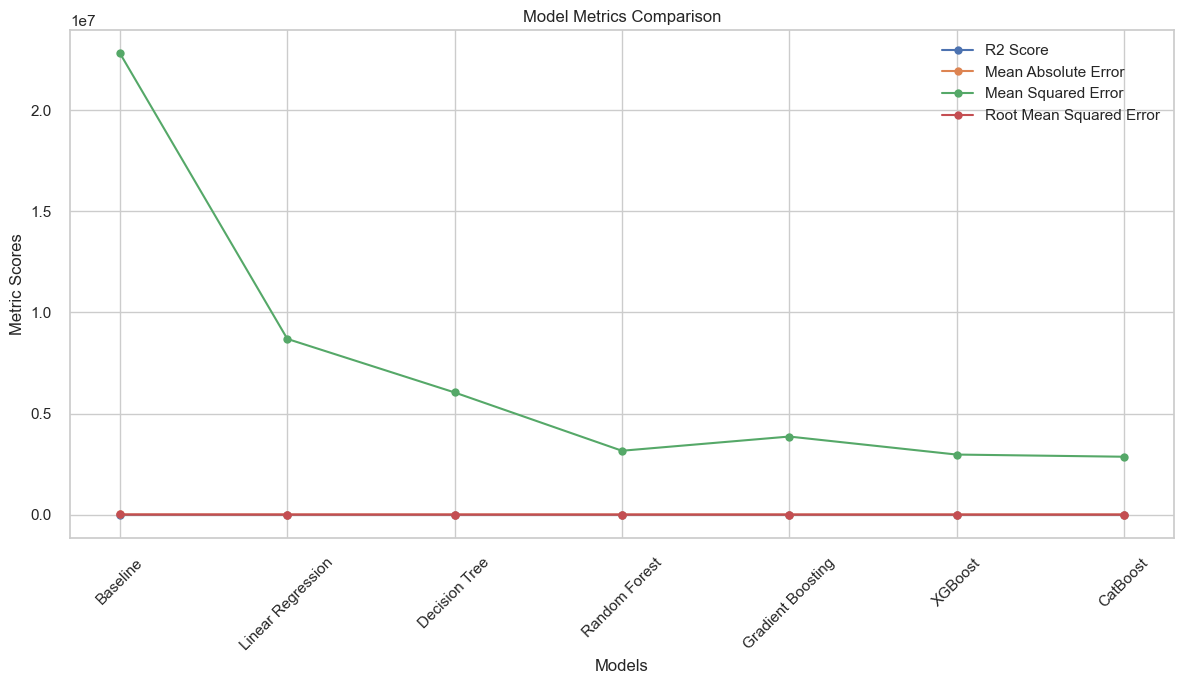

In [73]:
algorithms = list(models.keys())

plt.figure(figsize=(12, 7))

plt.plot(algorithms, df_r2.values, marker='o', label="R2 Score")
plt.plot(algorithms, df_mae.values, marker='o', label="Mean Absolute Error")
plt.plot(algorithms, df_mse.values, marker='o', label="Mean Squared Error")
plt.plot(algorithms, df_rmse.values, marker='o', label="Root Mean Squared Error")

plt.title("Model Metrics Comparison")
plt.xlabel("Models")
plt.ylabel("Metric Scores")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

c:\Users\hugod\anaconda3\envs\data_project\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 48648884.0000 - mae: 5355.0361 - val_loss: 41198024.0000 - val_mae: 5010.7271 - learning_rate: 0.0010
Epoch 2/100
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 31018306.0000 - mae: 4326.9199 - val_loss: 21326406.0000 - val_mae: 3686.7373 - learning_rate: 0.0010
Epoch 3/100
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 14517546.0000 - mae: 2913.7229 - val_loss: 8932362.0000 - val_mae: 2308.6611 - learning_rate: 0.0010
Epoch 4/100
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7092977.0000 - mae: 1923.7179 - val_loss: 4567244.5000 - val_mae: 1465.5950 - learning_rate: 0.0010
Epoch 5/100
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5434234.5000 - mae: 1604.1790 - val_loss: 4131798.2500 - val_mae: 1360.0713 - learning_rate: 0.0010
Epoch 6/100
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5195601.5000 - mae: 1579.2954 - val_loss: 4030872.5000 - val_mae: 1348.0138 - learning_rate: 0.0010
Epoch 7/100
1509/

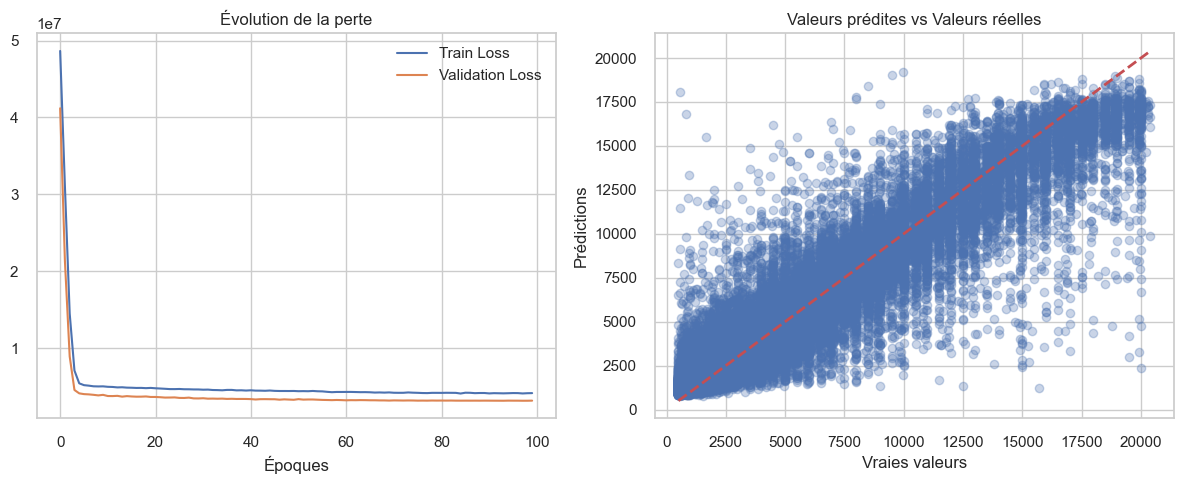

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. Séparation des caractéristiques et de la cible
X = df_train.drop('price', axis=1)  # Supposons que 'price' est votre variable cible
y = df_train['price']

# 2. Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 3. Prétraitement
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# 4. Création du modèle
input_dim = X_train_processed.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1)  # Couche de sortie pour la régression
])

# 5. Compilation
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. Callbacks
callbacks = [
    EarlyStopping(patience=15, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5)
]

# 7. Entraînement
history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=100,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# 8. Évaluation
y_pred = model.predict(X_test_processed).flatten()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.4f}')


# 9. Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte')
plt.xlabel('Époques')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Valeurs prédites vs Valeurs réelles')

plt.tight_layout()
plt.show()

In [79]:
from keras_tuner import Hyperband
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def build_model(hp):
    model = Sequential()
    
    # Hyperparamètres à optimiser
    for i in range(hp.Int('num_layers', 2, 6)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation='relu',
            kernel_regularizer=l2(hp.Float('l2_reg', 1e-6, 1e-2, sampling='log'))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    
    model.add(Dense(1))
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Initialisation du tuner
tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='tuner_results',
    project_name='car_price_prediction'
)

# Recherche des meilleurs hyperparamètres
tuner.search(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=100,
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    ]
)

# Meilleur modèle
best_model = tuner.get_best_models(num_models=1)[0]

Trial 33 Complete [00h 01m 46s]
val_loss: 4306004.0

Best val_loss So Far: 4161634.0
Total elapsed time: 02h 11m 29s

Search: Running Trial #34

Value             |Best Value So Far |Hyperparameter
6                 |3                 |num_layers
448               |416               |units_0
3.3878e-06        |1.1666e-06        |l2_reg
0.1               |0.3               |dropout
320               |512               |units_1
0.0010922         |0.0013565         |learning_rate
192               |480               |units_2
128               |384               |units_3
160               |64                |units_4
160               |64                |units_5
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 35712208.0000 - mae: 4554.4531 - val_loss: 13288219.0000 - v

KeyboardInterrupt: 